<a href="https://colab.research.google.com/github/prasadashu/Finance-Time-Series/blob/master/Refined_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#!pip install tf-nightly-2.0-preview

     |████████████████████████████████| 95.2MB 53kB/s 
     |████████████████████████████████| 3.8MB 29.4MB/s 
     |████████████████████████████████| 450kB 41.8MB/s 
     |████████████████████████████████| 81kB 9.3MB/s 
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
ERROR: tb-nightly 2.1.0a20191206 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0-dev20191002


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [3]:
data = pd.read_csv('data_full.csv')
dataframe = pd.DataFrame({'close': data['close'], 'timestamp': data['timestamp']})
close_mvng_avg = dataframe['close'][::-1].rolling(window = 10).mean()
dataframe.head()

,close,timestamp
0,782.3782,2019-09-27 15:15:00
1,781.4500,2019-09-27 15:00:00
2,783.4000,2019-09-27 14:45:00
3,780.8500,2019-09-27 14:30:00
4,783.0000,2019-09-27 14:15:00


In [0]:
close_mvng_avg = close_mvng_avg[::-1]

In [0]:
for i in range(len(dataframe['close'])):
  if dataframe['close'][i] == 0 or dataframe['close'][i] < 0:
    dataframe['close'][i] = 0.00001

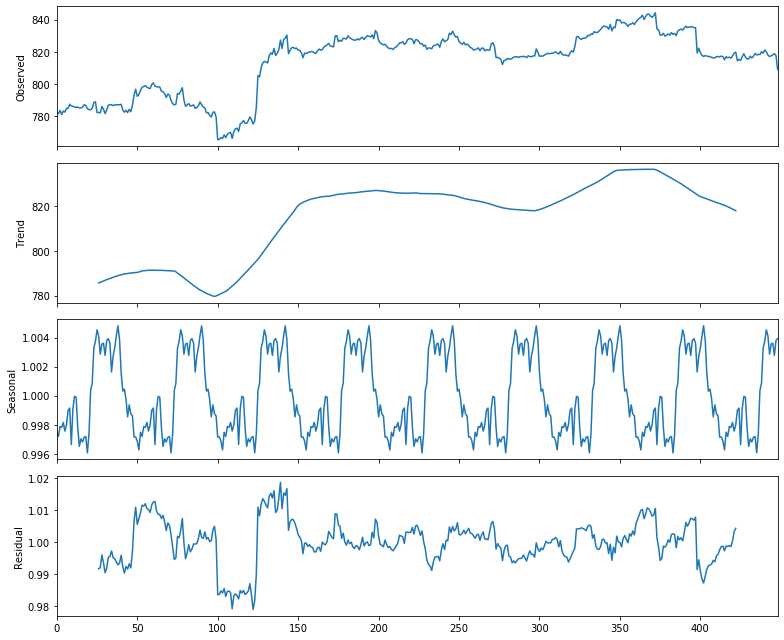

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
result = seasonal_decompose(dataframe['close'], model='multiplicative', freq = 52)
fig = result.plot()

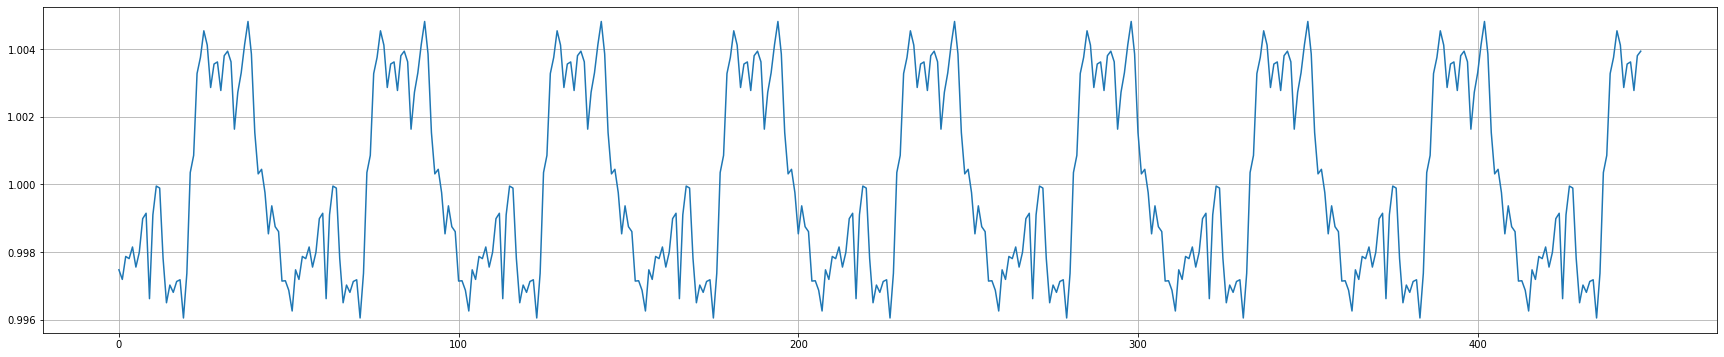

In [7]:
plt.figure(figsize = (30, 6))
plt.plot(result.seasonal)
plt.grid()

In [0]:
seasonal_array = np.array(result.seasonal)

In [0]:
seasonal_df = {'seasonal':seasonal_array, 'timestamp':data['timestamp']}

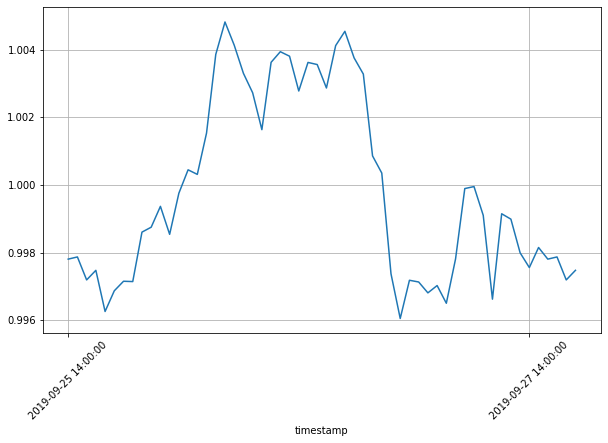

In [10]:
plt.figure(figsize = (10, 6))
sns.lineplot(y = seasonal_df['seasonal'][:56], x = seasonal_df['timestamp'][:56])
plt.xticks(rotation = 45)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
plt.grid()
plt.show()

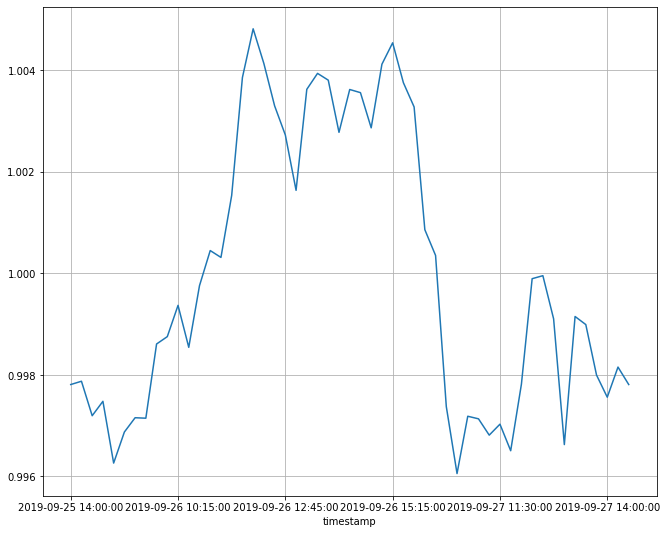

In [11]:
sns.lineplot(x = seasonal_df['timestamp'][3:56], y = seasonal_df['seasonal'][3:56])
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.grid()
plt.show()

In [12]:
seasonal_df['seasonal'][3:56]

array([0.99780937, 0.99815328, 0.99756001, 0.99799596, 0.99899028,
       0.99914959, 0.99662677, 0.99910365, 0.9999531 , 0.99989394,
       0.99781641, 0.99650587, 0.99702877, 0.99681291, 0.99713409,
       0.99718502, 0.99605622, 0.99737581, 1.00035198, 1.00085875,
       1.00327613, 1.0037542 , 1.00453925, 1.00411722, 1.00286488,
       1.0035578 , 1.00361994, 1.00277636, 1.00380377, 1.00393728,
       1.00362327, 1.00163404, 1.00272363, 1.00329796, 1.0041308 ,
       1.00481527, 1.00385555, 1.00153427, 1.0003128 , 1.0004479 ,
       0.99975666, 0.99854196, 0.99936872, 0.99875301, 0.9986076 ,
       0.99714647, 0.99715585, 0.99687432, 0.99626274, 0.99747911,
       0.99719529, 0.99787413, 0.99780937])

In [0]:
index_array = np.array(range(0, 52))

In [14]:
index_array

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51])

In [0]:
seasonal_dict = zip(index_array, seasonal_df['seasonal'][4:56])
seasonal_dict = dict(seasonal_dict)

In [16]:
seasonal_dict

{0: 0.998153276975345,
 1: 0.9975600069816809,
 2: 0.9979959564204554,
 3: 0.9989902832917148,
 4: 0.9991495915091785,
 5: 0.9966267718657629,
 6: 0.9991036491534078,
 7: 0.999953097431672,
 8: 0.9998939426037659,
 9: 0.9978164076784943,
 10: 0.9965058744012265,
 11: 0.9970287671090255,
 12: 0.9968129069723863,
 13: 0.997134094459358,
 14: 0.9971850242108479,
 15: 0.9960562164958313,
 16: 0.9973758082773934,
 17: 1.000351980824768,
 18: 1.0008587490728926,
 19: 1.003276132092388,
 20: 1.0037542037262026,
 21: 1.004539251102527,
 22: 1.0041172156746252,
 23: 1.0028648828951892,
 24: 1.003557803426826,
 25: 1.0036199447657848,
 26: 1.0027763646034906,
 27: 1.0038037716680468,
 28: 1.0039372753583236,
 29: 1.0036232736582358,
 30: 1.0016340441894365,
 31: 1.0027236302521096,
 32: 1.0032979639658484,
 33: 1.0041307980884204,
 34: 1.0048152699413504,
 35: 1.0038555529504642,
 36: 1.0015342723462648,
 37: 1.0003128023170285,
 38: 1.0004478971580861,
 39: 0.9997566608173206,
 40: 0.9985419605

This concludes that 0 -> start of the grpah from left side, 51 -> the end on right side

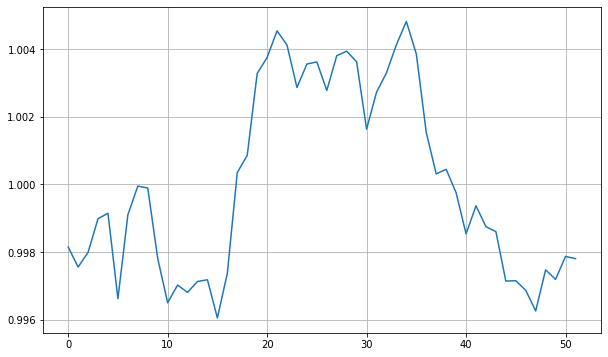

In [17]:
plt.figure(figsize = (10, 6))
plt.plot(seasonal_df['seasonal'][4:56])
plt.grid()

In [0]:
trend_array = np.array(result.trend)

1st approach consider the last value for known graph for remaining values

2nd approach is to implement moving average

In [19]:
# No. of NaNs
(np.isnan(trend_array) == True).sum() 

52

In [0]:
trend_array[:26] = trend_array[26]
trend_array[-26:] = trend_array[-27]

In [21]:
# No. of NaNs
(np.isnan(trend_array) == True).sum()

0

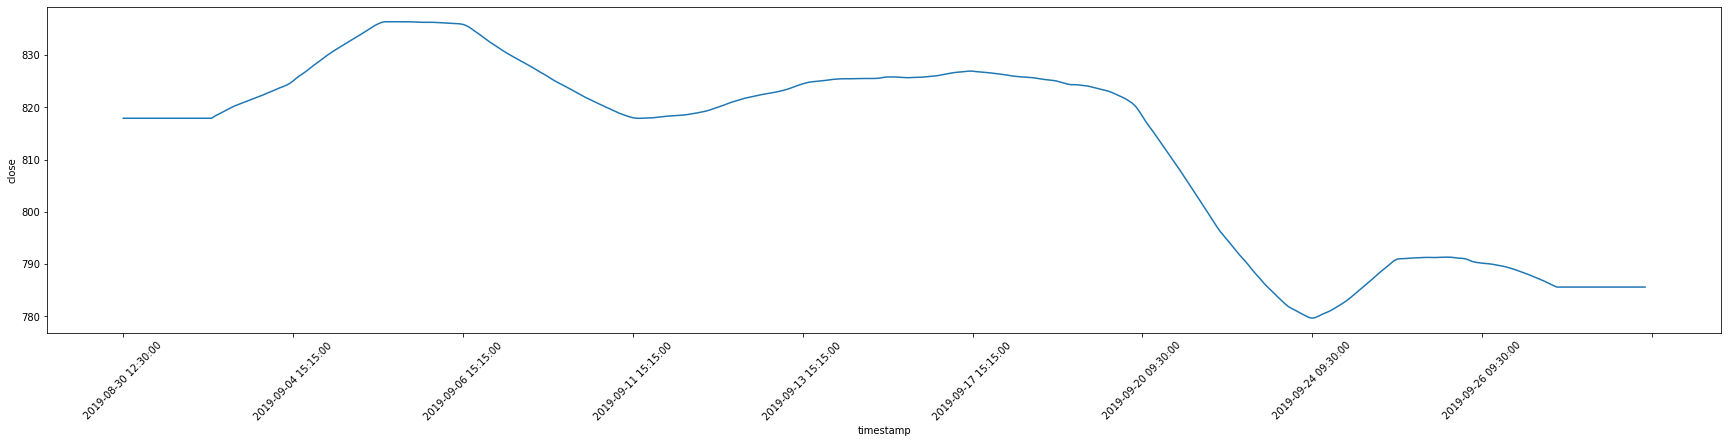

In [22]:
modi_trend_df = pd.DataFrame({'close': trend_array, 'timestamp': dataframe['timestamp']})

# Checking if the graph orientation is correct
plt.figure(figsize = (30, 6))
sns.lineplot(x = modi_trend_df['timestamp'], y = modi_trend_df['close'])
plt.xticks(rotation = 45)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
plt.show()

In [0]:
temp_close_mvng_avg = dataframe['close'][::-1].rolling(window = 10).mean()
temp_close_mvng_avg = np.array(temp_close_mvng_avg)

In [24]:
len(temp_close_mvng_avg)

449

In [25]:
len(dataframe['timestamp'])

449

In [26]:
timestamp_array = np.array(dataframe['timestamp'][::-1])
timestamp_array[:20]

array(['2019-08-30 12:30:00', '2019-09-03 09:15:00',
       '2019-09-03 09:30:00', '2019-09-03 09:45:00',
       '2019-09-03 10:00:00', '2019-09-03 10:15:00',
       '2019-09-03 10:30:00', '2019-09-03 10:45:00',
       '2019-09-03 11:00:00', '2019-09-03 11:15:00',
       '2019-09-03 11:30:00', '2019-09-03 11:45:00',
       '2019-09-03 12:00:00', '2019-09-03 12:15:00',
       '2019-09-03 12:30:00', '2019-09-03 12:45:00',
       '2019-09-03 13:00:00', '2019-09-03 13:15:00',
       '2019-09-03 13:30:00', '2019-09-03 13:45:00'], dtype=object)

Removing NaNs from moving average

In [0]:
temp_close_mvng_avg = temp_close_mvng_avg[9:]

In [0]:
timestamp_array = timestamp_array[9:]

In [29]:
len(timestamp_array)

440

In [30]:
len(temp_close_mvng_avg)

440

In [0]:
mvng_avg_df = pd.DataFrame({'Close Moving Avg': temp_close_mvng_avg, 'timestamp': timestamp_array})

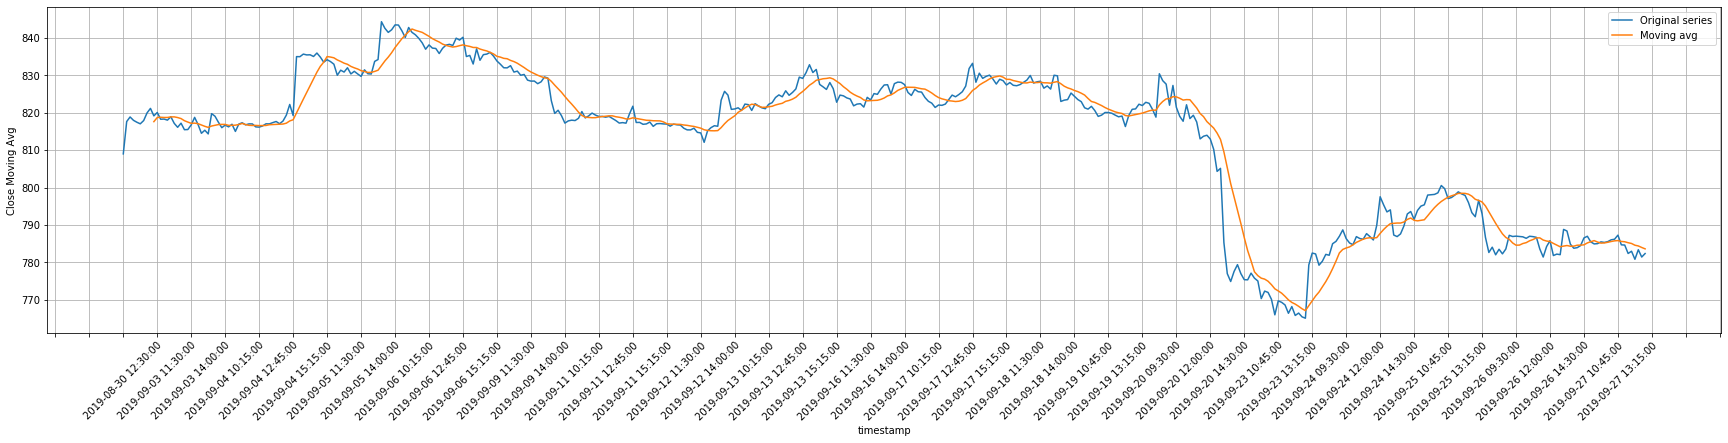

In [32]:
plt.figure(figsize = (30 , 6))
sns.lineplot(x = dataframe['timestamp'], y = dataframe['close'])
sns.lineplot(y = mvng_avg_df['Close Moving Avg'], x = mvng_avg_df['timestamp'])
plt.xticks(rotation = 45)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.legend(['Original series', 'Moving avg'])
plt.grid()
plt.show()

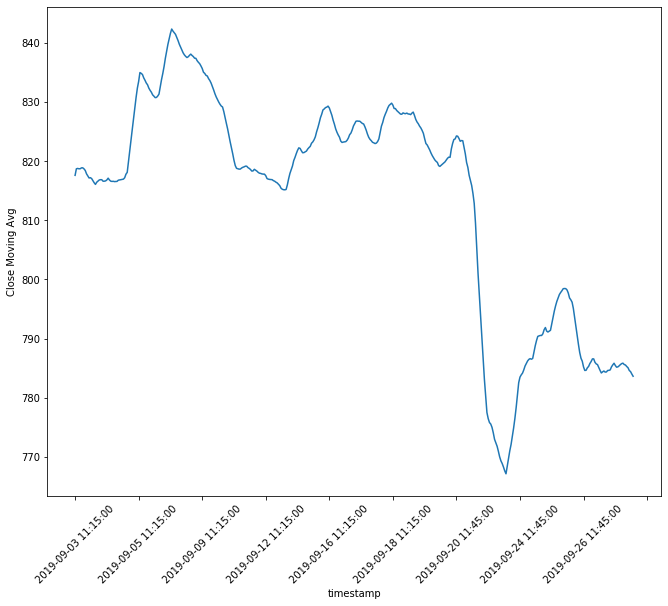

In [33]:
sns.lineplot(y = mvng_avg_df['Close Moving Avg'], x = mvng_avg_df['timestamp'])
plt.xticks(rotation = 45)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
plt.show()

Inorder to understand how the set has been oriented to feed into the network

In [34]:
mvng_avg_df

,Close Moving Avg,timestamp
0,817.60847,2019-09-03 11:15:00
1,818.71447,2019-09-03 11:30:00
2,818.77605,2019-09-03 11:45:00
3,818.72005,2019-09-03 12:00:00
4,818.72538,2019-09-03 12:15:00
...,...,...
435,785.07200,2019-09-27 14:15:00
436,784.60700,2019-09-27 14:30:00
437,784.41200,2019-09-27 14:45:00
438,784.00100,2019-09-27 15:00:00


In [0]:
window_size = 10
batch_size = 16
shuffle_buffer_size = 187

In [0]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift = 1, drop_remainder = True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [0]:
train_size_factor = 0.75
data_trend = mvng_avg_df['Close Moving Avg']
data_time = mvng_avg_df['timestamp']
data_size = len(data_trend)
train_data_size = int(data_size * train_size_factor)
train_data_trend = data_trend[:train_data_size]
train_data_time = data_time[:train_data_size]
valid_data_trend = data_trend[train_data_size:]
valid_data_time = data_time[train_data_size:]

In [38]:
valid_data_time

330    2019-09-23 13:00:00
331    2019-09-23 13:15:00
332    2019-09-23 13:30:00
333    2019-09-23 13:45:00
334    2019-09-23 14:00:00
              ...         
435    2019-09-27 14:15:00
436    2019-09-27 14:30:00
437    2019-09-27 14:45:00
438    2019-09-27 15:00:00
439    2019-09-27 15:15:00
Name: timestamp, Length: 110, dtype: object

In [39]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

train_set = windowed_dataset(train_data_trend, window_size, batch_size, shuffle_buffer = shuffle_buffer_size)

model = tf.keras.Sequential([
   tf.keras.layers.Dense(10, input_shape=[window_size], activation = "relu"),
   tf.keras.layers.Dense(10, activation = "relu"),
   tf.keras.layers.Dense(1),
   tf.keras.layers.Lambda(lambda x: x * 0.1)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)
history = model.fit(train_set, epochs=150, callbacks=[lr_schedule], verbose=1)

Epoch 1/150
20/20 [==============================] - 1s 31ms/step - loss: 775.6255
Epoch 2/150
20/20 [==============================] - 0s 4ms/step - loss: 775.4518
Epoch 3/150
20/20 [==============================] - 0s 4ms/step - loss: 775.2258
Epoch 4/150
20/20 [==============================] - 0s 4ms/step - loss: 774.9682
Epoch 5/150
20/20 [==============================] - 0s 4ms/step - loss: 774.6784
Epoch 6/150
20/20 [==============================] - 0s 4ms/step - loss: 774.3529
Epoch 7/150
20/20 [==============================] - 0s 4ms/step - loss: 773.9870
Epoch 8/150
20/20 [==============================] - 0s 4ms/step - loss: 773.5759
Epoch 9/150
20/20 [==============================] - 0s 4ms/step - loss: 773.1138
Epoch 10/150
20/20 [==============================] - 0s 5ms/step - loss: 772.5943
Epoch 11/150
20/20 [==============================] - 0s 4ms/step - loss: 772.0103
Epoch 12/150
20/20 [==============================] - 0s 4ms/step - loss: 771.3532
Epoch 13/150

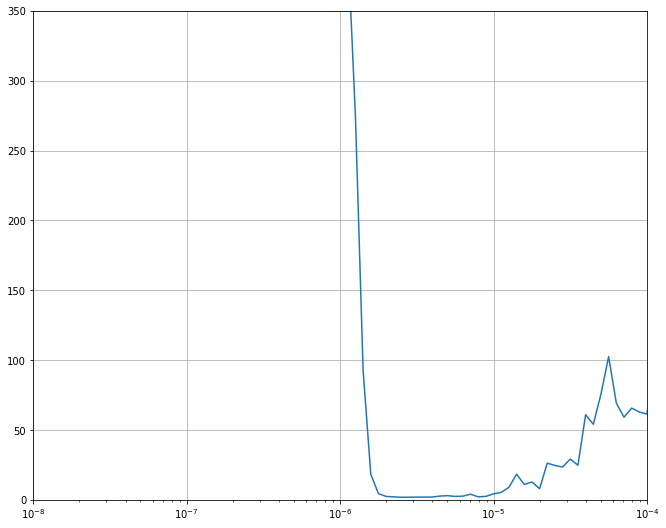

In [40]:
plt.semilogx(history.history['lr'], history.history['loss'])
plt.axis([1e-8, 1e-4, 0, 350])
plt.grid()

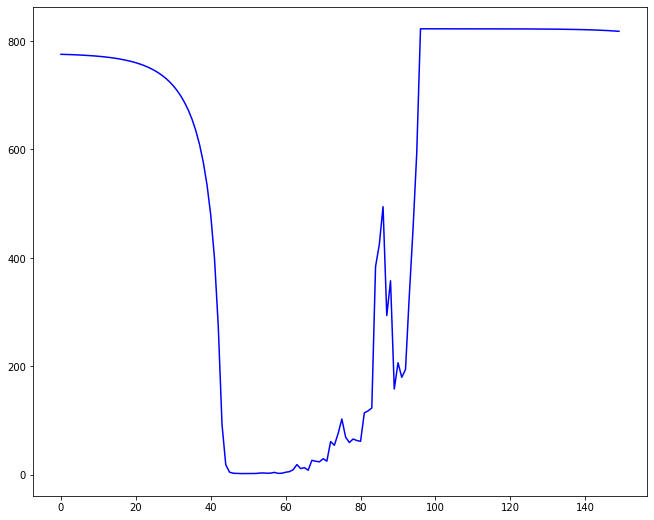

In [41]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.show()

In [42]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

train_set = windowed_dataset(train_data_trend, window_size, batch_size, shuffle_buffer = shuffle_buffer_size)

model = tf.keras.Sequential([
   tf.keras.layers.Dense(10, input_shape=[window_size], activation = "relu"),
   tf.keras.layers.Dense(10, activation = "relu"),
   tf.keras.layers.Dense(1),
   tf.keras.layers.Lambda(lambda x: x * 0.1)
])

optimizer = tf.keras.optimizers.SGD(lr=5.5e-6, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)
history = model.fit(train_set, epochs=70, verbose=1)

Epoch 1/70
20/20 [==============================] - 0s 23ms/step - loss: 749.0199
Epoch 2/70
20/20 [==============================] - 0s 4ms/step - loss: 620.7060
Epoch 3/70
20/20 [==============================] - 0s 4ms/step - loss: 298.0541
Epoch 4/70
20/20 [==============================] - 0s 6ms/step - loss: 65.5620
Epoch 5/70
20/20 [==============================] - 0s 5ms/step - loss: 19.8325
Epoch 6/70
20/20 [==============================] - 0s 5ms/step - loss: 5.5034
Epoch 7/70
20/20 [==============================] - 0s 4ms/step - loss: 5.3560
Epoch 8/70
20/20 [==============================] - 0s 4ms/step - loss: 5.9568
Epoch 9/70
20/20 [==============================] - 0s 4ms/step - loss: 2.4690
Epoch 10/70
20/20 [==============================] - 0s 5ms/step - loss: 2.4291
Epoch 11/70
20/20 [==============================] - 0s 5ms/step - loss: 2.1116
Epoch 12/70
20/20 [==============================] - 0s 5ms/step - loss: 2.7664
Epoch 13/70
20/20 [=====================

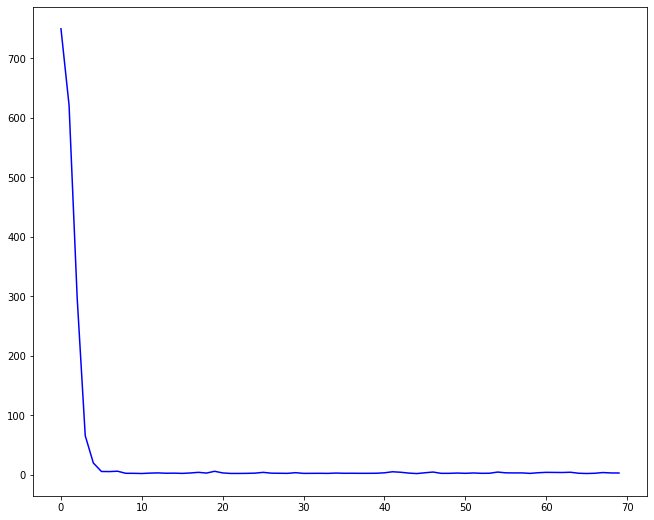

In [43]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.show()

In [44]:
len(temp_close_mvng_avg)

440

In [45]:
forecast = []
count = 50
for time in range(len(temp_close_mvng_avg) - window_size):
  print(str(time) + " - " + str(time+window_size) + " -> " + str(time+window_size+1))
  if count > 51:
    count = 0
  forecast.append(model.predict(temp_close_mvng_avg[time:time + window_size][np.newaxis]) * seasonal_dict[count])
  count+=1

#print(count)
#Next forecast
#forecast.append(model.predict(temp_close_mvng_avg[207:207 + window_size][np.newaxis]))  
  
forecaster = forecast[train_data_size - window_size:]
results = np.array(forecaster)[:, 0, 0]

0 - 10 -> 11
1 - 11 -> 12
2 - 12 -> 13
3 - 13 -> 14
4 - 14 -> 15
5 - 15 -> 16
6 - 16 -> 17
7 - 17 -> 18
8 - 18 -> 19
9 - 19 -> 20
10 - 20 -> 21
11 - 21 -> 22
12 - 22 -> 23
13 - 23 -> 24
14 - 24 -> 25
15 - 25 -> 26
16 - 26 -> 27
17 - 27 -> 28
18 - 28 -> 29
19 - 29 -> 30
20 - 30 -> 31
21 - 31 -> 32
22 - 32 -> 33
23 - 33 -> 34
24 - 34 -> 35
25 - 35 -> 36
26 - 36 -> 37
27 - 37 -> 38
28 - 38 -> 39
29 - 39 -> 40
30 - 40 -> 41
31 - 41 -> 42
32 - 42 -> 43
33 - 43 -> 44
34 - 44 -> 45
35 - 45 -> 46
36 - 46 -> 47
37 - 47 -> 48
38 - 48 -> 49
39 - 49 -> 50
40 - 50 -> 51
41 - 51 -> 52
42 - 52 -> 53
43 - 53 -> 54
44 - 54 -> 55
45 - 55 -> 56
46 - 56 -> 57
47 - 57 -> 58
48 - 58 -> 59
49 - 59 -> 60
50 - 60 -> 61
51 - 61 -> 62
52 - 62 -> 63
53 - 63 -> 64
54 - 64 -> 65
55 - 65 -> 66
56 - 66 -> 67
57 - 67 -> 68
58 - 68 -> 69
59 - 69 -> 70
60 - 70 -> 71
61 - 71 -> 72
62 - 72 -> 73
63 - 73 -> 74
64 - 74 -> 75
65 - 75 -> 76
66 - 76 -> 77
67 - 77 -> 78
68 - 78 -> 79
69 - 79 -> 80
70 - 80 -> 81
71 - 81 -> 82
72

In [0]:
size = len(temp_close_mvng_avg) - window_size
#print(size)
#size is 430

In [47]:
print(temp_close_mvng_avg[size:size + window_size][np.newaxis])

[[785.76915 785.84415 785.61515 785.53015 785.27515 785.072   784.607
  784.412   784.001   783.63382]]


In [48]:
print(model.predict(temp_close_mvng_avg[size:size + window_size][np.newaxis]) * seasonal_dict[48])

[[781.7067]]


In [49]:
print(model.predict(temp_close_mvng_avg[size:size + window_size][np.newaxis]) * seasonal_dict[49])

[[781.48425]]


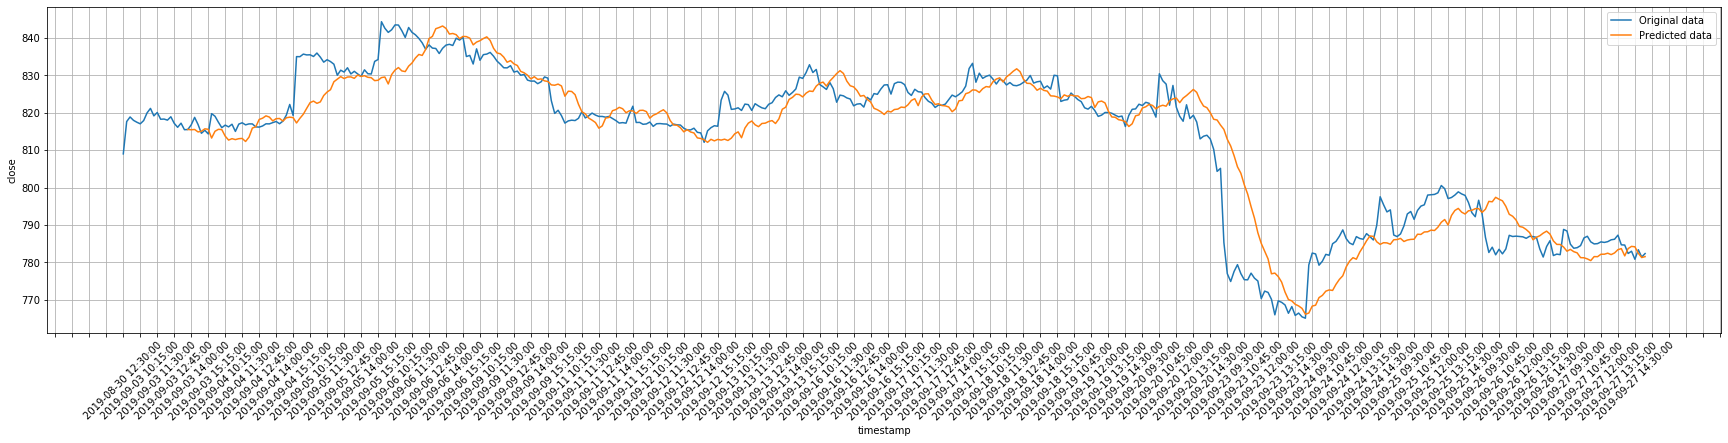

In [50]:
plt.figure(figsize = (30, 6))
sns.lineplot(x = dataframe['timestamp'], y = dataframe['close'])
sns.lineplot(x = mvng_avg_df['timestamp'][10:], y = np.array(forecast)[:, 0, 0])
#plt.plot(results)
#sns.lineplot(x = dataframe['timestamp'], y = dataframe['close'])
plt.xticks(rotation = 45)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.legend(['Original data', 'Predicted data'])
plt.grid()
plt.show()

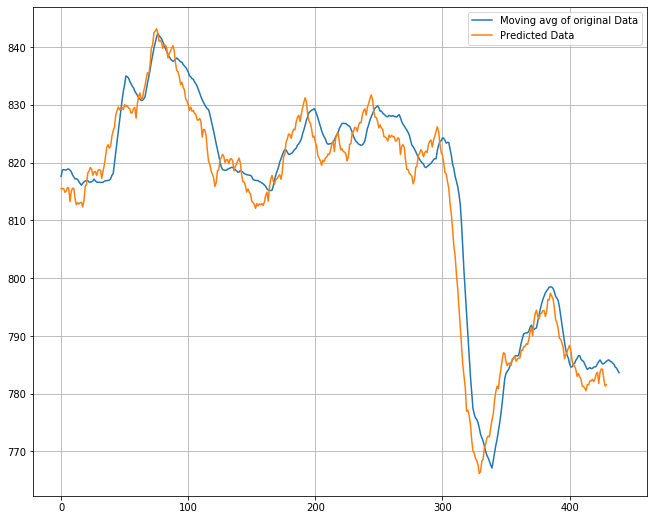

In [51]:
plt.plot(mvng_avg_df['Close Moving Avg'])
plt.plot(np.array(forecast)[:, 0, 0])
plt.legend(['Moving avg of original Data', 'Predicted Data'])
plt.grid()
plt.show()

In [52]:
len(dataframe['close'])

449

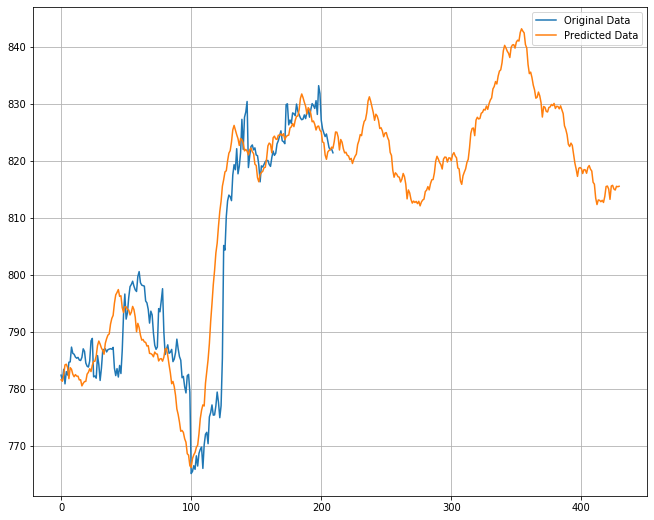

In [53]:
plt.plot(dataframe['close'][:210])
plt.plot(np.array(forecast)[:, 0, 0][::-1])
plt.legend(['Original Data', 'Predicted Data'])
plt.grid()
plt.show()

In [54]:
rev_dataframe = dataframe.iloc[::-1].reset_index(drop = True)
rev_dataframe

,close,timestamp
0,809.0000,2019-08-30 12:30:00
1,817.6342,2019-09-03 09:15:00
2,818.8600,2019-09-03 09:30:00
3,817.9600,2019-09-03 09:45:00
4,817.4500,2019-09-03 10:00:00
...,...,...
444,783.0000,2019-09-27 14:15:00
445,780.8500,2019-09-27 14:30:00
446,783.4000,2019-09-27 14:45:00
447,781.4500,2019-09-27 15:00:00


In [0]:
train_size_factor = 0.75
data_trend = rev_dataframe['close']
data_time = rev_dataframe['timestamp']
data_size = len(rev_dataframe['close'])
train_data_size = int(data_size * train_size_factor)
train_data_trend = data_trend[:train_data_size]
train_data_time = data_time[:train_data_size]
valid_data_trend = data_trend[train_data_size:]
valid_data_time = data_time[train_data_size:]

In [0]:
train_data_trend = train_data_trend.values.reshape(train_data_trend.shape[0], 1)
valid_data_trend = valid_data_trend.values.reshape(valid_data_trend.shape[0], 1)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data_trend)
train_data_trend_rescaled = scaler.transform(train_data_trend)
valid_data_trend_rescaled = scaler.transform(valid_data_trend)

In [108]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

train_set = windowed_dataset(train_data_trend_rescaled, window_size, batch_size, shuffle_buffer = shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch/20))

optimizer = tf.keras.optimizers.SGD(lr = 1e-2, momentum = 0.9)

model.compile(loss = tf.keras.losses.Huber(),
              optimizer = optimizer,
              metrics = ['mae'])

history = model.fit(train_set, epochs = 200, callbacks = [lr_schedule])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/200
21/21 [==============================] - 4s 188ms/step - loss: 0.2303 - mae: 0.6608
Epoch 2/200
21/21 [==============================] - 0s 15ms/step - loss: 0.2283 - mae: 0.6587
Epoch 3/200
21/21 [==============================] - 0s 15ms/step - loss: 0.2294 - mae: 0.6586
Epoch 4/200
21/21 [==============================] - 0s 15ms/step - loss: 0.2292 - mae: 0.6595
Epoch 5/200
21/21 [==============================] - 0s 15ms/step - loss: 0.2278 - mae: 0.6592
Epoch 6/200
21/21 [=============

[1e-08, 100.0, 0, 20]

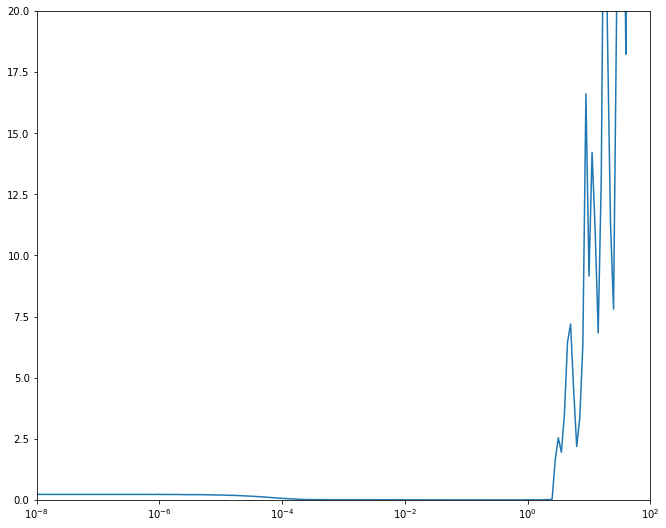

In [109]:
plt.semilogx(history.history['lr'], history.history['loss'])
plt.axis([1e-8, 1e+2, 0, 20])

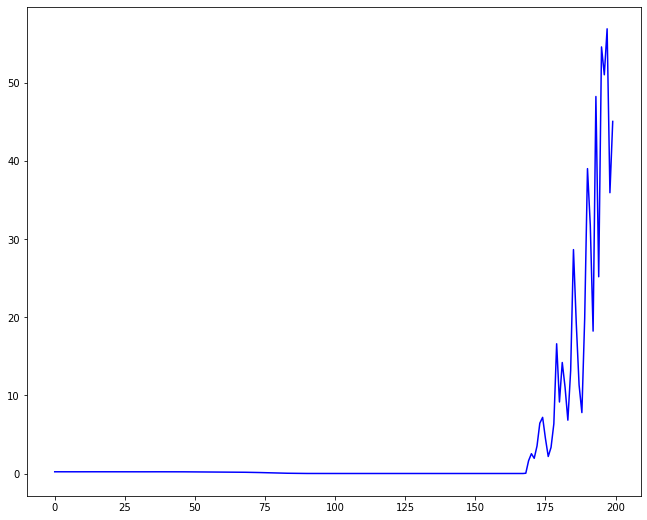

In [110]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.show()

In [112]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

train_set = windowed_dataset(train_data_trend_rescaled, window_size, batch_size, shuffle_buffer = shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(lr = 1e-2, momentum = 0.9)

model.compile(loss = tf.keras.losses.Huber(),
              optimizer = optimizer,
              metrics = ['mae'])

history = model.fit(train_set, epochs = 150)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/150
21/21 [==============================] - 3s 151ms/step - loss: 0.0762 - mae: 0.3249
Epoch 2/150
21/21 [==============================] - 0s 15ms/step - loss: 0.0128 - mae: 0.1181
Epoch 3/150
21/21 [==============================] - 0s 14ms/step - loss: 0.0116 - mae: 0.1086
Epoch 4/150
21/21 [==============================] - 0s 15ms/step - loss: 0.0105 - mae: 0.1003
Epoch 5/150
21/21 [==============================] - 0s 15ms/step - loss: 0.0109 - mae: 0.1012
Epoch 6/150
21/21 [=============

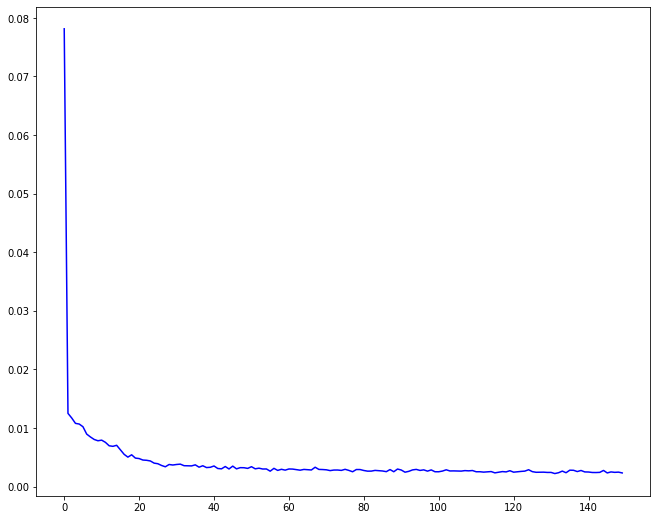

In [113]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.show()

In [0]:
trend_array_1 = scaler.transform(np.array(rev_dataframe['close']).reshape(rev_dataframe['close'].shape[0], 1))

In [0]:
new_forecast = []
for time in range(len(trend_array_1) - window_size):
  new_forecast.append(model.predict(trend_array_1[time:time + window_size][np.newaxis]))
  
forecaster = new_forecast[train_data_size - window_size:]
results = np.array(forecaster)[:, 0, 0]

In [116]:
len(new_forecast)

439

In [117]:
len(mvng_avg_df['timestamp'][1:])

439

In [0]:
new_forecast = np.array(new_forecast).reshape(len(new_forecast), 1)

In [0]:
new_forecast = scaler.inverse_transform(new_forecast)

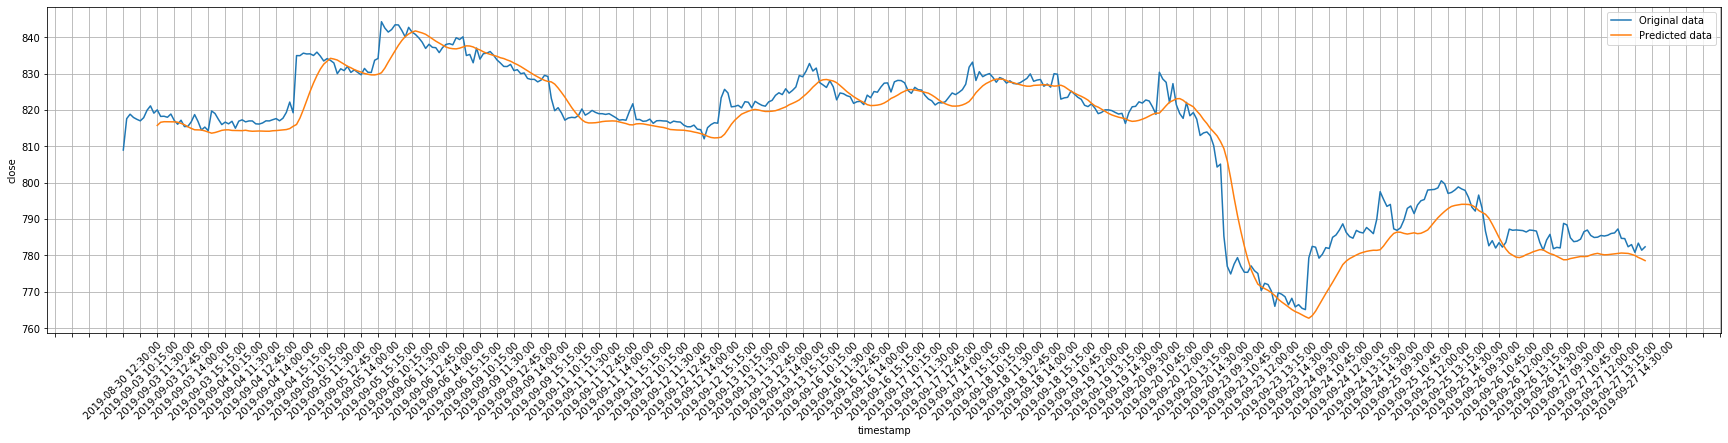

In [120]:
plt.figure(figsize = (30, 6))
sns.lineplot(x = dataframe['timestamp'], y = dataframe['close'])
sns.lineplot(x = mvng_avg_df['timestamp'][1:], y = new_forecast.reshape(new_forecast.shape[0],))
#plt.plot(results)
#sns.lineplot(x = dataframe['timestamp'], y = dataframe['close'])
plt.xticks(rotation = 45)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.legend(['Original data', 'Predicted data'])
plt.grid()
plt.show()